In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data_preprocessed_sort.csv')
df.head(5)

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,approval_flg,bundle_flg,region_size_numeric
0,422206773,58.0,0.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,1,NaN,NaN,1,0,0,NaN,NaN
1,348648289,44.0,1.0,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,W,NaN,2,RUS,NaN,2,0,0,1.0,4.0
2,345496995,23.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,W,NaN,6,NaN,NaN,4,0,1,0.0,1.0
3,138498254,30.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,7,NaN,NaN,0,0,0,NaN,NaN
4,64946855,31.0,1.0,town,0.0,0.0,0.0,0.0,1.0,0.0,...,W,NaN,6,RUS,UNM,4,0,0,NaN,1.0


Три фактора для изучения:

region_size - Размер населённого пункта клиента

product_cd - Код продукта, по поводу которого звонили

functional_cd - Причина, по которой звонили


План анализа:

1. Распределения и примитивные графики для каждого из признаков
2. Процент успеха для различных комбинаций факторов
3. Добавление категорий
4. Выводы и заключения


**region_size**

Размер населённого пункта
клиента:

• msk — Москва

• urban — Город-миллионник

• town — Город (не миллионник)

• rural — Сельская местность

In [6]:
df['region_size'].unique()

array(['no', 'rural', 'town', 'urban', 'msk'], dtype=object)

In [8]:
df['region_size'].value_counts()

region_size
no       6230
town     5068
urban    2250
msk      1321
rural     915
Name: count, dtype: int64

Для дальнейшего исследования всё-таки будет интереснее смотреть именно на тех юзеров, у которых нет пропуска(значение не no) для этого признака

In [9]:
df_region = df[df['region_size'] != 'no']

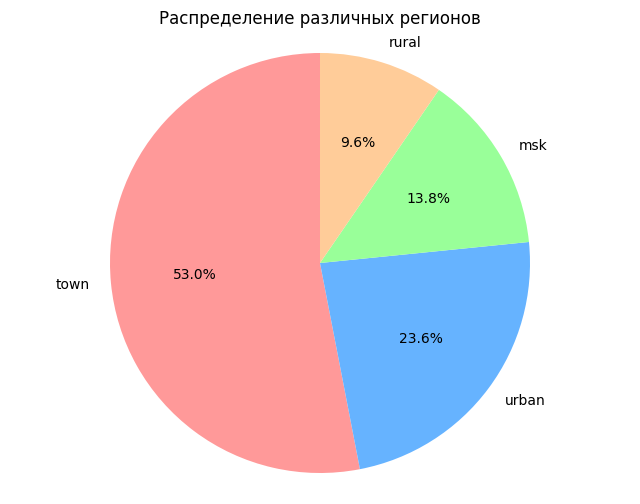

In [11]:
region_counts = df_region['region_size'].value_counts()

plt.figure(figsize=(8, 6))
pastel_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
plt.title('Распределение различных регионов')
plt.axis('equal')
plt.show()

В датасете больше всего данных о пользователях из городов-миллиоников, но тк в дальнейшем мы планируем поделить на большие и маленькие города, то у нас выйдет подобное соотношение

town + msk = 66%

urban + rural = 34%

терпимое соотношение

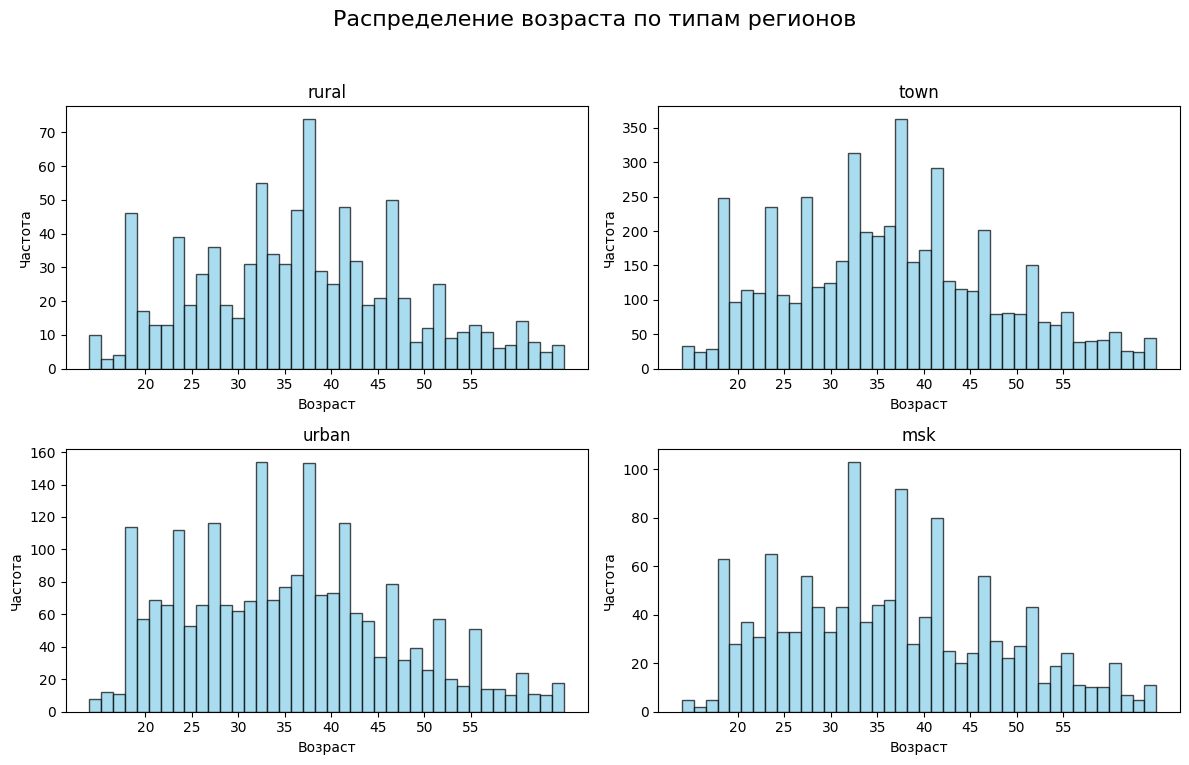

In [18]:
region_types = df_region['region_size'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes = axes.flatten()

for ax, region in zip(axes, region_types):
    subset = df_region[df_region['region_size'] == region]
    ax.hist(subset['age'], bins=40, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(region)
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')
    ax.set_xticks(np.arange(20, 60, 5))

plt.suptitle('Распределение возраста по типам регионов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Распредление возрастов в каждом из типов регионов приблительно одинаковый

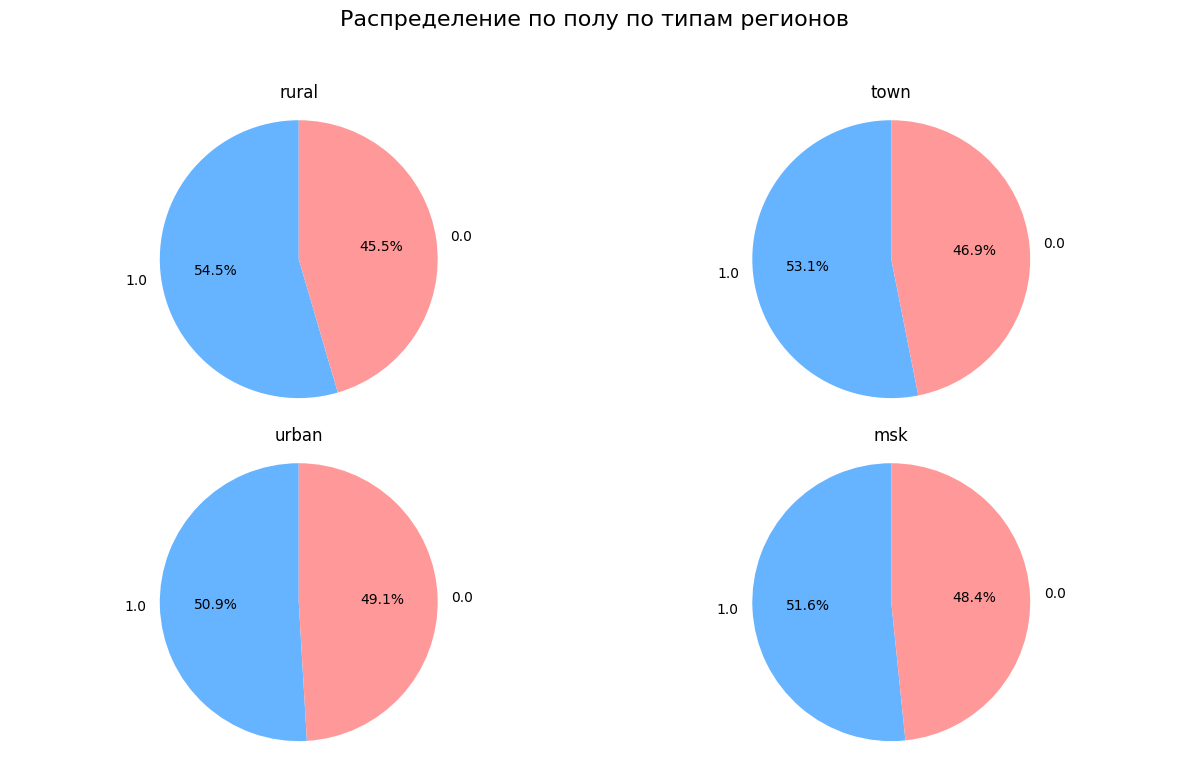

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes = axes.flatten()

for ax, region in zip(axes, region_types):
    subset = df_region[df_region['region_size'] == region]
    gender_counts = subset['gender_cd'].value_counts()
    ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    ax.set_title(region)
    ax.axis('equal') 

plt.suptitle('Распределение по полу по типам регионов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Соотношения по мужчинам и женщинам для каждого региона приблизительно одинаковое

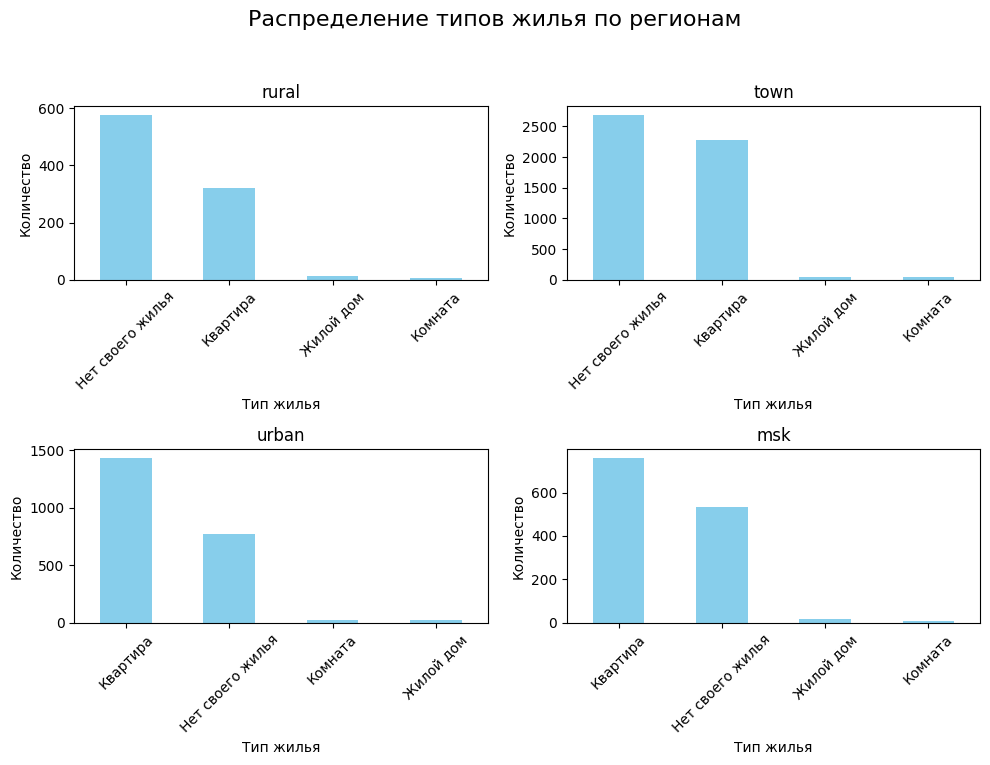

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for ax, region in zip(axes, region_types):
    subset = df_region[df_region['region_size'] == region]
    realty_counts = subset['realty_type'].value_counts()
    realty_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(region)
    ax.set_xlabel('Тип жилья')
    ax.set_ylabel('Количество')
    ax.set_xticklabels(realty_counts.index, rotation=45)

plt.suptitle('Распределение типов жилья по регионам', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

У людей из более маленьких городов больше людей без своего жилья, в то время как в больших городах преобладает количество людей со своей квартирой

**Product_cd**



In [31]:
df['product_cd'].value_counts()

product_cd
Credit Cards          8541
Cash Loan             2191
MVNO                  1603
Debit Cards           1579
Investment             680
Secured Loan           395
Mortgage Insurance     305
Casco                  236
Car Loan               234
Deposit                 10
Osago                    5
Travel Avia              3
T-Auto                   2
Name: count, dtype: int64

Сразу можно отбросить те категории продукта, где очень мало наблюдений. Удаляю: Deposit, Osago, Travel Avia, T-Auto

In [33]:
df_product = df[~df['product_cd'].isin(['T-Auto', 'Travel Avia', 'Osago', 'Deposit'])]

Credit Cards - кредитная карта

Cash Loan - кредит на руки

MVNO - виртуальный оператор сотовой связи

Debit Cards - дебитовые карты

Investment - инвестиции

Secured Loan - обеспеченный кредит

Mortgage Insurance - Ипотечное страхование

Casco -страхование транспортных средств

Car Loan - автомобильный кредит

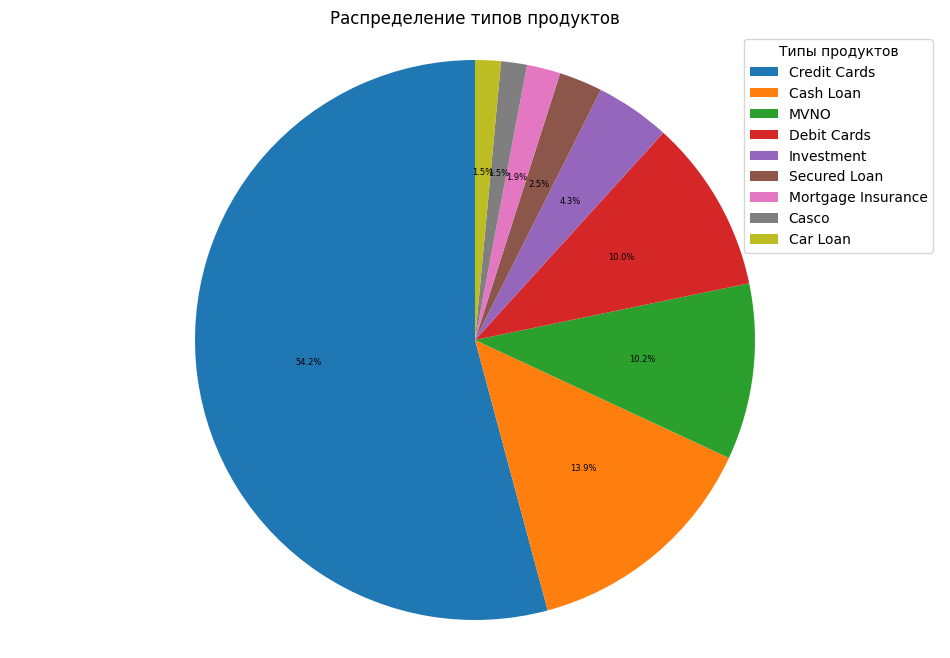

In [45]:
region_counts = df_product['product_cd'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(region_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})
plt.title('Распределение типов продуктов')
plt.legend(region_counts.index, title="Типы продуктов", loc="upper right")
plt.axis('equal')
plt.show()

очень много звонков по поводу кредитных карт, возможно стоит в целом в их сторону посмотреть, но я не уверена

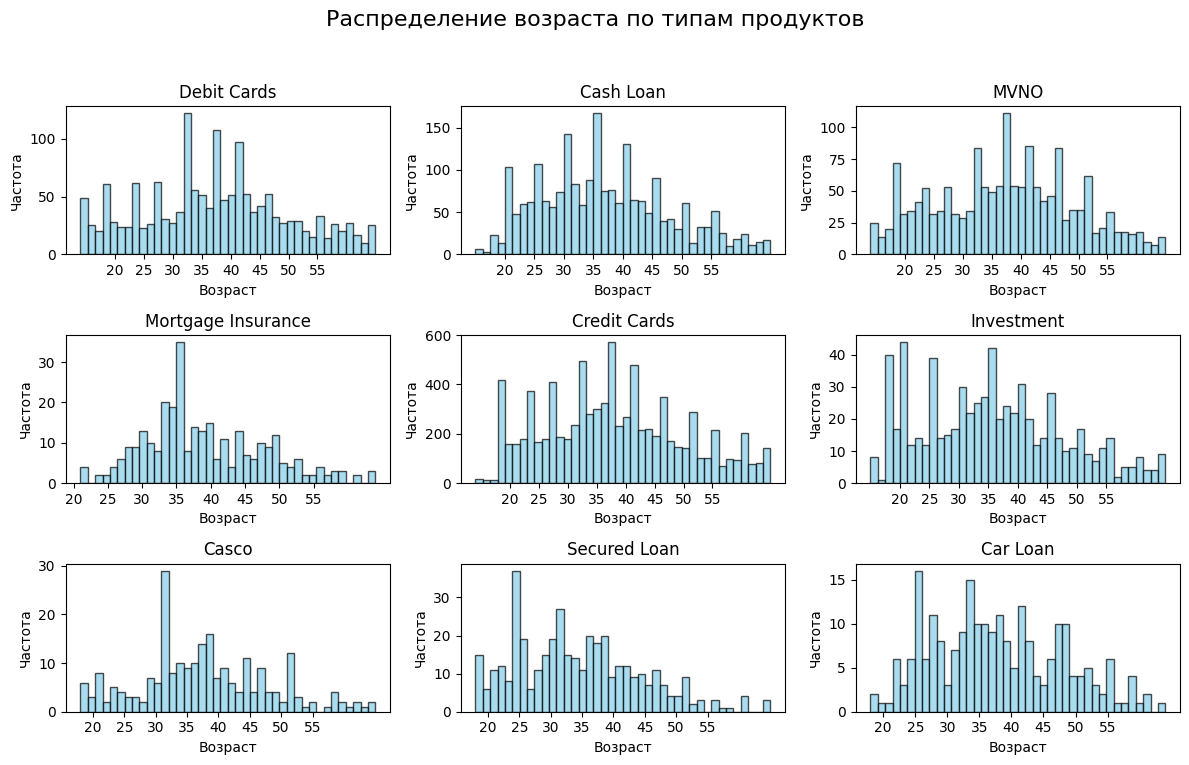

In [48]:
product_types = df_product['product_cd'].unique()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

axes = axes.flatten()

for ax, product in zip(axes, product_types):
    subset = df_product[df_product['product_cd'] == product]
    ax.hist(subset['age'], bins=40, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(product)
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')
    ax.set_xticks(np.arange(20, 60, 5))

plt.suptitle('Распределение возраста по типам продуктов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

кредитки предлагают в основном людям старше 20(что в целом логично)

кредит с залогом начинают меньше предлагать чем старше человек становится

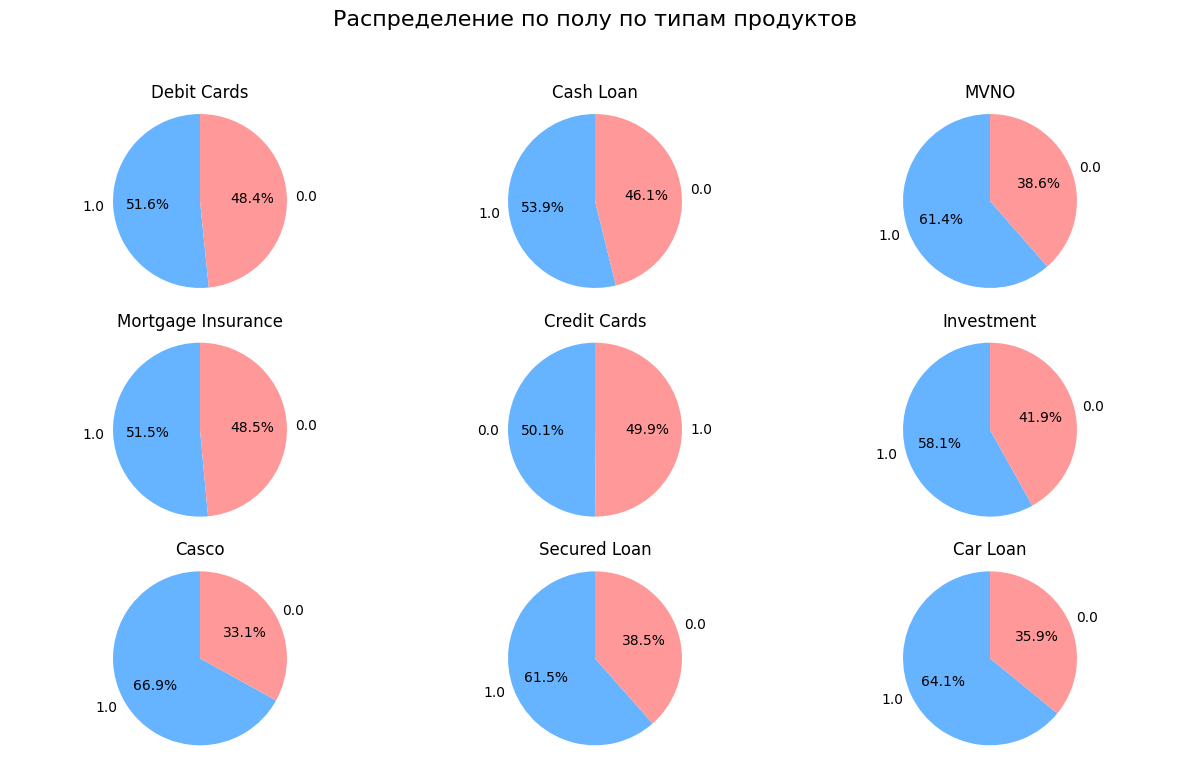

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

axes = axes.flatten()

for ax, product in zip(axes, product_types):
    subset = df_product[df_product['product_cd'] == product]
    gender_counts = subset['gender_cd'].value_counts()
    ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    ax.set_title(product)
    ax.axis('equal') 

plt.suptitle('Распределение по полу по типам продуктов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ну и как же без количества успехов для каждого из продуктов

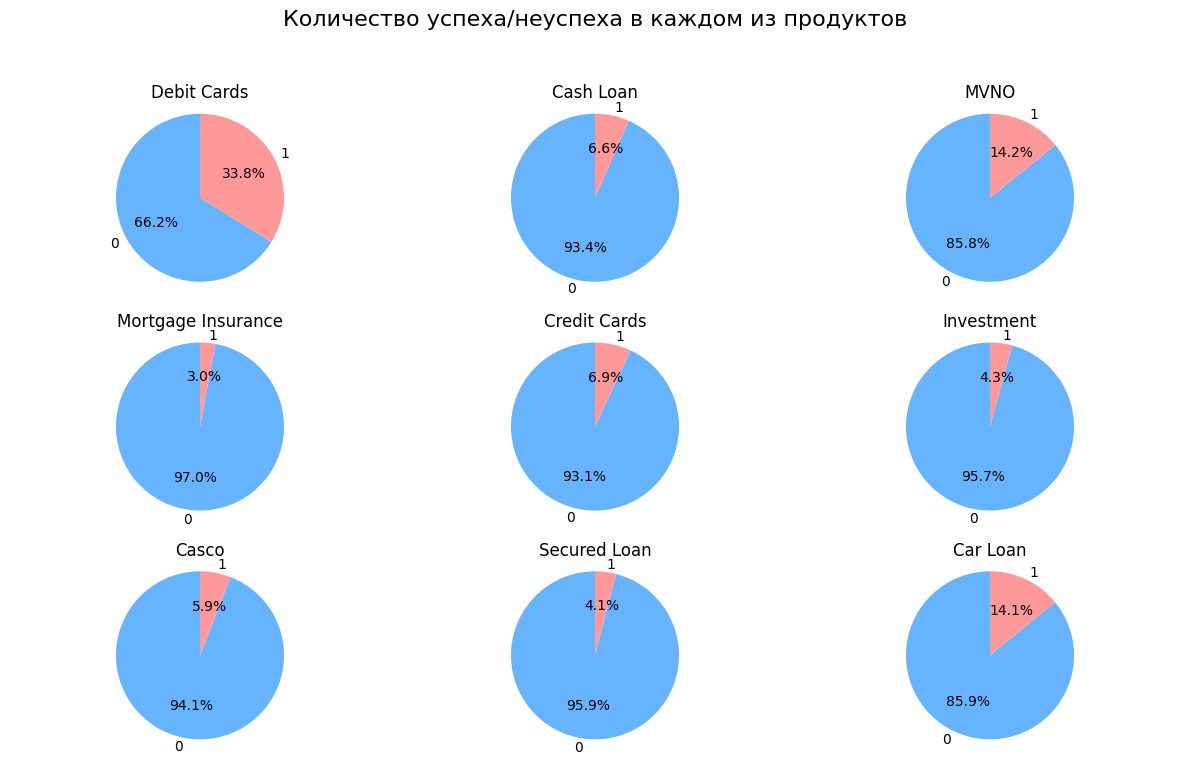

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

axes = axes.flatten()

for ax, product in zip(axes, product_types):
    subset = df_product[df_product['product_cd'] == product]
    gender_counts = subset['approval_flg'].value_counts()
    ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    ax.set_title(product)
    ax.axis('equal') 

plt.suptitle('Количество успеха/неуспеха в каждом из продуктов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

У нас есть такие достаточно плегкие продукты это дибетовая карта и  MNVO и они как видно по ним неплохо заканчиваются звонки

но подписочным или не подписочным?

In [52]:
df_debit = df[df['product_cd'] == 'Debit Cards']

In [55]:
df_debit['functional_cd'].value_counts()

functional_cd
Utilization     477
Cold            467
Meeting         429
Afterfilling    140
BAF              66
Name: count, dtype: int64

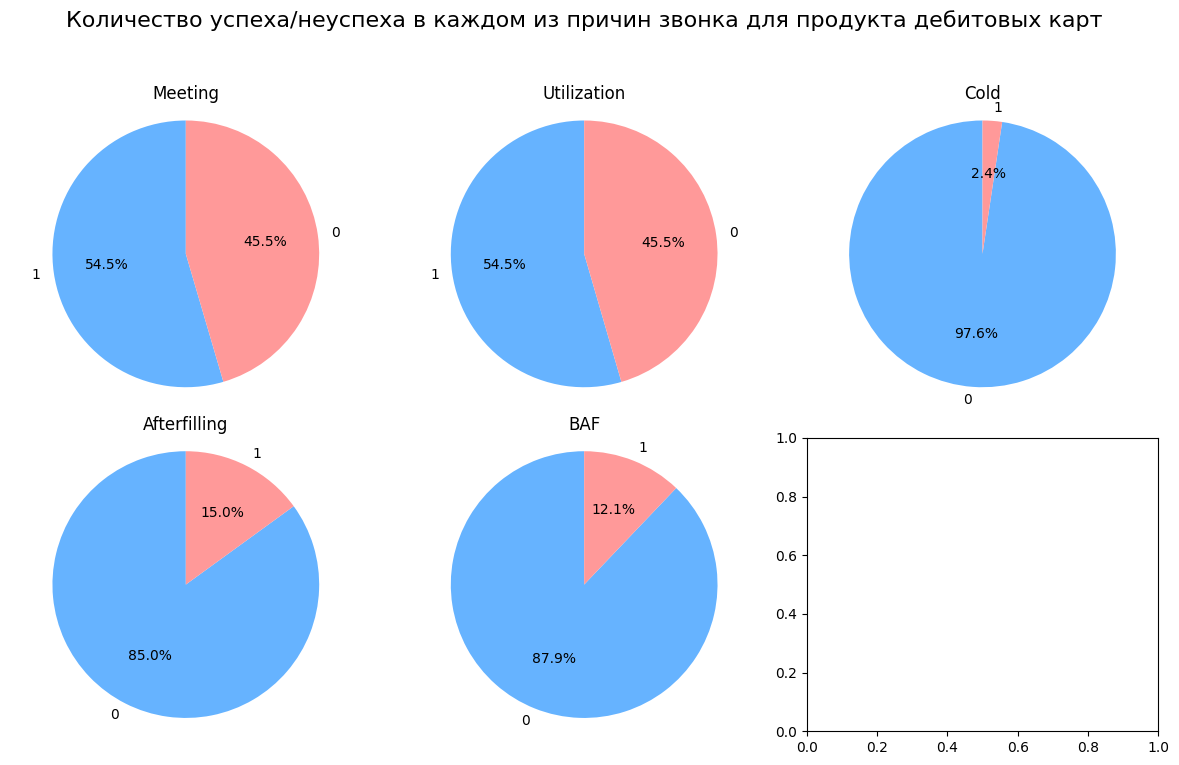

In [56]:
func_types = df_debit['functional_cd'].unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes = axes.flatten()

for ax, func in zip(axes, func_types):
    subset = df_debit[df_debit['functional_cd'] == func]
    approv_counts = subset['approval_flg'].value_counts()
    ax.pie(approv_counts, labels=approv_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    ax.set_title(func)
    ax.axis('equal') 

plt.suptitle('Количество успеха/неуспеха в каждом из причин звонка для продукта дебитовых карт', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [57]:
df['functional_cd'].value_counts()

functional_cd
Preapprove       7935
Afterfilling     1892
Utilization      1414
Cold             1377
Upsell           1124
Meeting           826
Agreement         420
Incoming          218
Reutilization     187
Downsell          185
Activation         87
BAF                66
Autoleads          36
Deposit            10
Prolongation        6
Refinancing         1
Name: count, dtype: int64

In [72]:
df_preapprove = df[df['functional_cd'] == 'Preapprove']

In [73]:
df_preapprove['bundle_nm'].value_counts()

bundle_nm
0          6284
Pro        1546
Premium     105
Name: count, dtype: int64

In [76]:
df_preapprove[df['bundle_nm'] == '0']['product_cd'].value_counts()

C:\Users\valer\AppData\Local\Temp\ipykernel_8444\1361450394.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_preapprove[df['bundle_nm'] == '0']['product_cd'].value_counts()


product_cd
Credit Cards    5735
Cash Loan        478
Car Loan          71
Name: count, dtype: int64

In [77]:
df_preapprove[df_preapprove['bundle_nm'] == 'Pro']['product_cd'].value_counts()

product_cd
Credit Cards    1190
Cash Loan        337
Car Loan          19
Name: count, dtype: int64

In [80]:
df_preapprove[(df_preapprove['bundle_nm'] == 'Pro') & (df_preapprove['approval_flg'] == 1)].shape[0] / df_preapprove[df['bundle_nm'] == 'Pro'].shape[0]

C:\Users\valer\AppData\Local\Temp\ipykernel_8444\1450324161.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_preapprove[(df_preapprove['bundle_nm'] == 'Pro') & (df_preapprove['approval_flg'] == 1)].shape[0] / df_preapprove[df['bundle_nm'] == 'Pro'].shape[0]


0.025226390685640362

In [81]:
df_preapprove[(df_preapprove['bundle_nm'] == '0') & (df_preapprove['approval_flg'] == 1)].shape[0] / df_preapprove[df['bundle_nm'] == '0'].shape[0]

C:\Users\valer\AppData\Local\Temp\ipykernel_8444\1888197823.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_preapprove[(df_preapprove['bundle_nm'] == '0') & (df_preapprove['approval_flg'] == 1)].shape[0] / df_preapprove[df['bundle_nm'] == '0'].shape[0]


0.036760025461489494

In [82]:
import numpy as np
from scipy.stats import chi2_contingency

# Данные: количество успехов и неудач в каждой группе
# Группа A: 30 успехов и 20 неудач (50 - 30)
# Группа B: 20 успехов и 30 неудач (50 - 20)

successes_A = df_preapprove[(df_preapprove['bundle_nm'] == '0') & (df_preapprove['approval_flg'] == 1)].shape[0]
failures_A = df_preapprove[df['bundle_nm'] == '0'].shape[0] - successes_A
successes_B = df_preapprove[(df_preapprove['bundle_nm'] == 'Pro') & (df_preapprove['approval_flg'] == 1)].shape[0]
failures_B = df_preapprove[df['bundle_nm'] == 'Pro'].shape[0] - successes_B

# Создание таблицы сопряженности
contingency_table = np.array([[successes_A, failures_A],
                               [successes_B, failures_B]])

# Применение хи-квадрат теста
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Вывод результатов
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

# Проверка значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: различие между группами статистически значимо.")
else:
    print("Не отвергаем нулевую гипотезу: различие между группами не статистически значимо.")


Chi-squared statistic: 4.61703434958623
P-value: 0.03165592473413651
Отвергаем нулевую гипотезу: различие между группами статистически значимо.


C:\Users\valer\AppData\Local\Temp\ipykernel_8444\3068154479.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failures_A = df_preapprove[df['bundle_nm'] == '0'].shape[0] - successes_A
C:\Users\valer\AppData\Local\Temp\ipykernel_8444\3068154479.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failures_B = df_preapprove[df['bundle_nm'] == 'Pro'].shape[0] - successes_B


In [86]:
df_preapprove[(df_preapprove['bundle_nm'] == 'Pro') & (df_preapprove['approval_flg'] == 0)]['wo_hit_status_reason_desc'].value_counts()

wo_hit_status_reason_desc
Кредитная карта не нужна                           681
Отказ прослушать предложение                       242
Кредит уже не нужен                                234
Отказ по всем продуктам                            120
Третье лицо                                         68
Другое                                              60
Не звонить                                          48
Клиент ранее отказался                              13
Другой банк                                          8
Не устраивает одобренная сумма                       8
Другое (укажи в комментарии)                         6
Высокая ставка по кредиту                            5
Не нужна подписка                                    3
Не интересно                                         2
Отказался от диалога                                 2
Не заинтересовало предложение/Нет необходимости      1
Не устраивают условия                                1
Некорректный трансфер                  

In [87]:
df_preapprove[(df_preapprove['bundle_nm'] == '0') & (df_preapprove['approval_flg'] == 0)]['wo_hit_status_reason_desc'].value_counts()

wo_hit_status_reason_desc
Кредитная карта не нужна                           2529
Отказ прослушать предложение                       1411
Кредит уже не нужен                                 873
Третье лицо                                         427
Не звонить                                          294
Отказ по всем продуктам                             184
Другое                                              178
Другой банк                                          75
Клиент ранее отказался                               41
Высокая ставка по кредиту                            14
Не устраивают условия                                 8
Не устраивает одобренная сумма                        6
Чёрный список                                         4
негатив к Тинькофф                                    3
Другое (укажи в комментарии)                          2
Отказался от диалога                                  1
Не выполню условия Premium                            1
Не заинтересовало пред